1- Importing Libraries

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn import metrics

from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,precision_score

from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# 2- Data Exploration

In [49]:
traindf = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
testdf = pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")

In [50]:
traindf.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [51]:
train = traindf[["AMT_CREDIT","AMT_INCOME_TOTAL","AMT_ANNUITY","NAME_CONTRACT_TYPE","NAME_INCOME_TYPE","NAME_HOUSING_TYPE","NAME_EDUCATION_TYPE","CNT_CHILDREN","FLAG_OWN_REALTY","FLAG_OWN_CAR","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
train

,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,CNT_CHILDREN,FLAG_OWN_REALTY,FLAG_OWN_CAR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,406597.5,202500.0,24700.5,Cash loans,Working,House / apartment,Secondary / secondary special,0,Y,N,0.083037,0.262949,0.139376,1
1,1293502.5,270000.0,35698.5,Cash loans,State servant,House / apartment,Higher education,0,N,N,0.311267,0.622246,NaN,0
2,135000.0,67500.0,6750.0,Revolving loans,Working,House / apartment,Secondary / secondary special,0,Y,Y,NaN,0.555912,0.729567,0
3,312682.5,135000.0,29686.5,Cash loans,Working,House / apartment,Secondary / secondary special,0,Y,N,NaN,0.650442,NaN,0
4,513000.0,121500.0,21865.5,Cash loans,Working,House / apartment,Secondary / secondary special,0,Y,N,NaN,0.322738,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,254700.0,157500.0,27558.0,Cash loans,Working,With parents,Secondary / secondary special,0,N,N,0.145570,0.681632,NaN,0
307507,269550.0,72000.0,12001.5,Cash loans,Pensioner,House / apartment,Secondary / secondary special,0,Y,N,NaN,0.115992,NaN,0
307508,677664.0,153000.0,29979.0,Cash loans,Working,House / apartment,Higher education,0,Y,N,0.744026,0.535722,0.218859,0
307509,370107.0,171000.0,20205.0,Cash loans,Commercial associate,House / apartment,Secondary / secondary special,0,Y,N,NaN,0.514163,0.661024,1


In [52]:
def fillna_df(df):
    for column in df.select_dtypes("object").columns:
        df[column] = df[column].fillna(df[column].mode())
        
    for column in df.select_dtypes("number").columns:
        df[column] = df[column].fillna(df[column].median())
    return df

# Data Cleaning & Preprocessing

Removing Null Values :

In [53]:
train.isnull().sum()

AMT_CREDIT                  0
AMT_INCOME_TOTAL            0
AMT_ANNUITY                12
NAME_CONTRACT_TYPE          0
NAME_INCOME_TYPE            0
NAME_HOUSING_TYPE           0
NAME_EDUCATION_TYPE         0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
EXT_SOURCE_1           173378
EXT_SOURCE_2              660
EXT_SOURCE_3            60965
TARGET                      0
dtype: int64

In [54]:
fillna_df(train)

,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,CNT_CHILDREN,FLAG_OWN_REALTY,FLAG_OWN_CAR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,406597.5,202500.0,24700.5,Cash loans,Working,House / apartment,Secondary / secondary special,0,Y,N,0.083037,0.262949,0.139376,1
1,1293502.5,270000.0,35698.5,Cash loans,State servant,House / apartment,Higher education,0,N,N,0.311267,0.622246,0.535276,0
2,135000.0,67500.0,6750.0,Revolving loans,Working,House / apartment,Secondary / secondary special,0,Y,Y,0.505998,0.555912,0.729567,0
3,312682.5,135000.0,29686.5,Cash loans,Working,House / apartment,Secondary / secondary special,0,Y,N,0.505998,0.650442,0.535276,0
4,513000.0,121500.0,21865.5,Cash loans,Working,House / apartment,Secondary / secondary special,0,Y,N,0.505998,0.322738,0.535276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,254700.0,157500.0,27558.0,Cash loans,Working,With parents,Secondary / secondary special,0,N,N,0.145570,0.681632,0.535276,0
307507,269550.0,72000.0,12001.5,Cash loans,Pensioner,House / apartment,Secondary / secondary special,0,Y,N,0.505998,0.115992,0.535276,0
307508,677664.0,153000.0,29979.0,Cash loans,Working,House / apartment,Higher education,0,Y,N,0.744026,0.535722,0.218859,0
307509,370107.0,171000.0,20205.0,Cash loans,Commercial associate,House / apartment,Secondary / secondary special,0,Y,N,0.505998,0.514163,0.661024,1


Encoding :

In [55]:
train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].apply(
    lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].apply(
    lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))

In [56]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['NAME_EDUCATION_TYPE']= label_encoder.fit_transform(train['NAME_EDUCATION_TYPE'])
  
train['NAME_EDUCATION_TYPE'].unique()

array([4, 1, 2, 3, 0])

In [57]:
train['NAME_CONTRACT_TYPE']= label_encoder.fit_transform(train['NAME_CONTRACT_TYPE'])
  
train['NAME_CONTRACT_TYPE'].unique()

array([0, 1])

In [58]:
train['NAME_HOUSING_TYPE']= label_encoder.fit_transform(train['NAME_HOUSING_TYPE'])
  
train['NAME_HOUSING_TYPE'].unique()

array([1, 4, 5, 2, 3, 0])

In [59]:
from category_encoders import TargetEncoder
Targetenc = TargetEncoder()
# transforming the column after fitting
train['NAME_INCOME_TYPE'] = Targetenc.fit_transform(X = train.NAME_INCOME_TYPE, y = train.TARGET)

Oversampling

<AxesSubplot:xlabel='TARGET'>

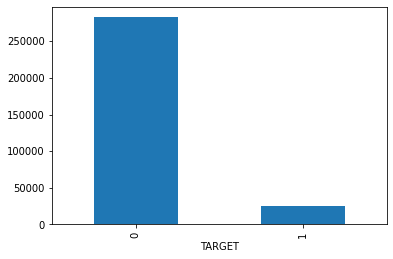

In [60]:
train.pivot_table(index='TARGET', aggfunc='size').plot(kind='bar')

In [61]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train[["AMT_ANNUITY","NAME_HOUSING_TYPE","NAME_EDUCATION_TYPE","AMT_CREDIT","AMT_INCOME_TOTAL","CNT_CHILDREN","FLAG_OWN_REALTY","FLAG_OWN_CAR"]], train['TARGET'])

# Feature Engineering

In [62]:
train['Debt_Income_ratio'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']

# Feature Selection

In [63]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    mi_scores = mutual_info_regression(X, y,discrete_features = "auto", random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#Function to plot the created information scores :
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

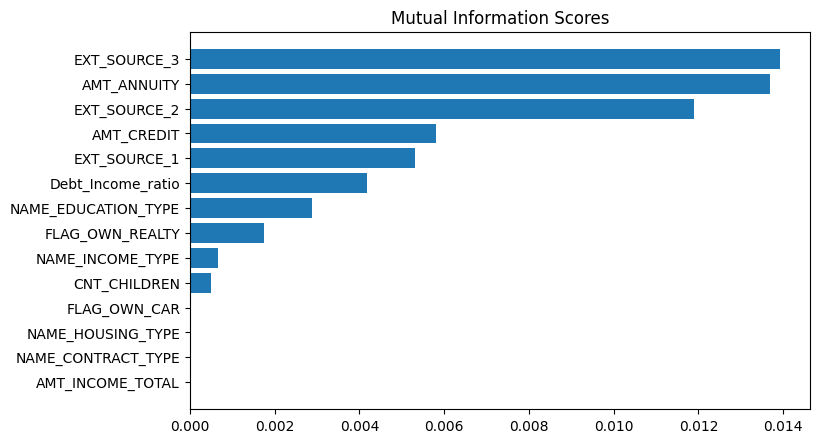

In [64]:
X = train.copy()
Y = X.pop('TARGET')

mi_scores = make_mi_scores(X, Y)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [69]:
X = X.drop(['FLAG_OWN_CAR','NAME_HOUSING_TYPE','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL'],axis = 1)
X.columns

# Implementing a Model : 

Scaling

In [71]:
sc_train = StandardScaler()
sc_test = StandardScaler()

Training Model

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [74]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("ACCURACY: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY 1:  0.9183901766435131
